## 1. Import the necessary libraries

In [289]:
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
from tqdm import tqdm
import pandas as pd
from keras.utils import to_categorical
from keras.utils import plot_model
from pyvi import ViTokenizer
import matplotlib.pyplot as plt
import import_ipynb
from data_preprocessing_sa import remove_punctuation, remove_stopword, normalize_numbers, remove_repeated_words
from keras.callbacks import EarlyStopping
from sklearn.manifold import TSNE
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, LSTM, TimeDistributed,Input
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2 Data preprocessing

> Read File CSV

In [290]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

> Execute function

In [291]:
X_train,y_train = ReadData("../data/data_processed/trainprocessed.csv")
X_test,y_test=ReadData("../data/data_processed/testprocesssed.csv")

In [292]:
print(f"X_Train size:{X_train.shape}")
print(f"y_train size {y_train.shape}")

X_Train size:(8898,)
y_train size (8898,)


> word separation

In [293]:
def wordseparation(comment):
    return [review.split() for review in comment]

In [294]:
X_train=wordseparation(X_train)
X_test=wordseparation(X_test)
print(f"X_Train: {X_train[0:2]}")
print(f"X_test: {X_test[0:2]}")

X_Train: [['pin', 'kém', 'còn', 'miễn', 'chê', 'mua', 'number', 'tình_trạng', 'pin', 'còn', 'number', 'ai', 'giống', 'tôi'], ['sao', 'gọi', 'điện_thoại', 'màn_hình', 'chấm', 'nhỏ', 'nháy', 'gần', 'camera', 'vậylúc']]
X_test: [['điện', 'thoải', 'ổn', 'facelock', 'cực', 'nhanh', 'vân', 'tay', 'ôk', 'màn_hình', 'lớn', 'pin', 'trâu', 'liên_quân', 'zalo', 'youtube', 'một', 'ngày', 'mất', 'khoảng', 'number', 'tuy', 'chip', 'number', 'mượt', 'đa_nhiệm', 'khá', 'ổn'], ['mình', 'mới', 'mua', 'vivonumberc', 'tải', 'ứng_dụng', 'games', 'nhanh', 'hài_lòng', 'cài', 'hình', 'nền', 'khóa', 'màn_hình', 'hay', 'mình', 'biết', 'hết', 'chức_năng', 'nó', 'tư_vấn', 'viên', 'nhiệt_tình']]


> word embedding

In [295]:
model_wordembedding = Word2Vec(sentences=X_train, vector_size=128, window=5, min_count=0, workers=4, sg=1)
model_wordembedding.wv.save("../model/word.model")

> Load Model_Word2Vec

In [296]:
model_embedding = KeyedVectors.load('../model/word.model')
num_words = len(model_embedding.index_to_key)
print("Number of Words:", num_words)
print("Vector:", model_embedding.get_vector('phần_mềm'))

Number of Words: 11338
Vector: [ 0.16336718 -0.5932939   0.2517994   0.22065844 -0.06516986 -0.25112584
 -0.03365841 -0.02468711  0.0038976   0.31055844  0.3006868  -0.11659209
 -0.19689402 -0.11628892  0.11446258  0.17667003 -0.1938225  -0.03639162
 -0.1341044   0.02094603  0.1576949   0.51227367 -0.08233491 -0.41047293
 -0.2508695   0.05601614 -0.21289977  0.15374185 -0.10703909 -0.19362389
  0.27349976 -0.30712712  0.15579666  0.40045944 -0.14454442  0.03407225
  0.21128742 -0.20081891  0.02250007 -0.07582849  0.02025412  0.45479488
  0.00592968 -0.32858405  0.50323164  0.07700393 -0.0908977  -0.08085003
  0.01927937  0.28833655  0.14578418  0.1856993   0.30164713  0.0710434
 -0.12268583 -0.11289176  0.33751497 -0.07515439  0.24370028 -0.10351017
  0.09607257  0.03995639 -0.07079981 -0.06343044  0.22357213 -0.1668296
  0.12924404  0.16985917 -0.21402131 -0.3191688   0.04071475 -0.41450176
 -0.29491067 -0.06318223  0.17446274 -0.26421225 -0.14750843  0.04919785
 -0.21274011  0.199959

> Get a list of vector representations of words

In [297]:
# Lấy danh sách các vectơ từ
vectors = [model_embedding.get_vector(word) for word in model_embedding.index_to_key]
vectors_array = np.array(vectors)
# Giảm chiều dữ liệu từ 128 chiều xuống còn 2 chiều bằng t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors_array)
print(vectors_2d[0:2])

[[88.25751  12.480247]
 [87.26554  19.419909]]


> Visualize the context and semantic correlation of words

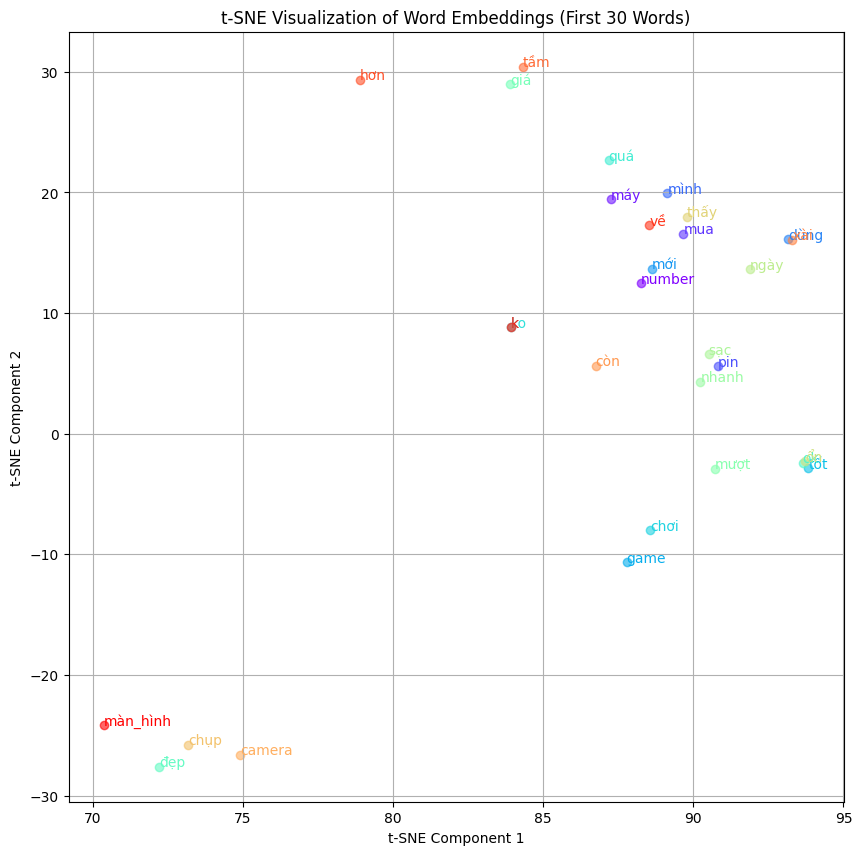

In [298]:
# Trực quan hóa các vectơ từ
plt.figure(figsize=(10, 10))
num_words = 30
# Màu cho mỗi từ
colors = plt.cm.rainbow(np.linspace(0, 1, num_words))

# Vẽ các điểm dữ liệu (từ) với màu khác nhau
for i, word in enumerate(model_embedding.index_to_key[:num_words]):  
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], marker='o', color=colors[i], alpha=0.6)
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=10, color=colors[i])

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Word Embeddings (First 30 Words)')
plt.grid(True)
plt.show()


> Corpus

In [299]:
corpus=model_embedding.key_to_index

> Check to see how many words the longest sentence has

In [300]:
max_sequence = max([len(seq) for seq in X_train])
max_sequence_t=max ([len(seq) for seq in X_test ])
print(max_sequence)
print(max_sequence_t)

128
131


> convert words to vector space and padding

In [301]:
def comment_embedding(comment):
    matrix = np.zeros((131, 128))
    for i, word in enumerate(comment):
            if word in model_embedding:
                matrix[i] = model_embedding.get_vector(word)
    return matrix

> Execute Function

In [302]:
train_data = []
test_data =[]
for x in tqdm(X_train):
    train_data.append(comment_embedding(x))
for y in tqdm(X_test): 
    test_data.append(comment_embedding(y))
test_data=np.array(test_data)
train_data=np.array(train_data)

100%|██████████| 2224/2224 [00:00<00:00, 6070.85it/s]


> Convert labels to numbers

In [303]:
label_encoder = LabelEncoder()
# Mã hóa các nhãn văn bản thành các giá trị số
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.transform(y_test)
print(y_train_encoded[0:3])

[1 0 1]


> Convert label to one_hot_vector

In [304]:
# Biểu diễn nhãn dưới dạng one-hot vector
y_train_onehot = to_categorical(y_train_encoded)
print(y_train_onehot[0:3])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## 3.Built Model CNN

### 3.1. Design configuration for CNN network

In [305]:
num_classes = 3
filter_sizes = 3
num_filters = 150
epochs = 100
dropout_rate = 0.3
embedding_size=128
num_lstm_unit=20
pool_size=(2, 1)
strides=(2, 1)

> transform input properties

In [306]:
x_train = train_data.reshape(train_data.shape[0], 131, embedding_size, 1).astype('float32')

### 3.2. Model CNN

In [307]:
# Define the model
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(num_filters, (filter_sizes, embedding_size), activation='relu',
                 input_shape=(131, embedding_size, 1),name='convolution_layer'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size,strides,name='max_pooling'))
model.add(TimeDistributed(Flatten()))
model.add(Dropout(dropout_rate,name='dropout_layer1'))
model.add(LSTM(num_lstm_unit, return_sequences=True,name='LSTM_layer1'))
model.add(Dropout(dropout_rate,name='dropout_layer2'))
model.add(LSTM(num_lstm_unit,name='LSTM_layer2'))
model.add(Dense(3, activation='softmax'))

c:\Users\hdang\.virtualenvs\DM-xmUrTfoX\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### 3.3. Hyperparameter

In [308]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 3.4. Train

> Monitor the trainning process to stop earlier

In [309]:
# Khởi tạo callback EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='loss', 
    patience=15,          
    restore_best_weights=True  
)

In [310]:
model.fit(
    x_train,
    y_train_onehot,
    verbose=1,
    epochs=epochs,
    callbacks=[early_stopping_callback] 
)

Epoch 1/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.4974 - loss: 0.9642
Epoch 2/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.5202 - loss: 0.9491
Epoch 3/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - accuracy: 0.5176 - loss: 0.9419
Epoch 4/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.5153 - loss: 0.9414
Epoch 5/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.5148 - loss: 0.9495
Epoch 6/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.5193 - loss: 0.9320
Epoch 7/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.5171 - loss: 0.9515
Epoch 8/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.5158 - loss: 0.9453
Epoch 9/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.5152 - loss: 0.9471
Epoch 10/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.5090 - loss: 0.9484
Epoch 11/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.5159 - loss: 0.9402
Epoch 12/100
279/27

>Network Architecture

In [311]:
print(model.summary())

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolution_layer (Conv2D)      │ (None, 129, 1, 150)    │        57,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 129, 1, 150)    │           600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling (MaxPooling2D)      │ (None, 64, 1, 150)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_11             │ (None, 64, 150)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer1 (Dropout)        │ (None, 64, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer1 (LSTM)              │ (None, 64, 20)         │        13,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer2 (Dropout)        │ (None, 64, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer2 (LSTM)              │ (None, 20)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,521 (880.95 KB)

 Trainable params: 75,073 (293.25 KB)

 Non-trainable params: 300 (1.17 KB)

 Optimizer params: 150,148 (586.52 KB)

None


> Network Architecture Diagram

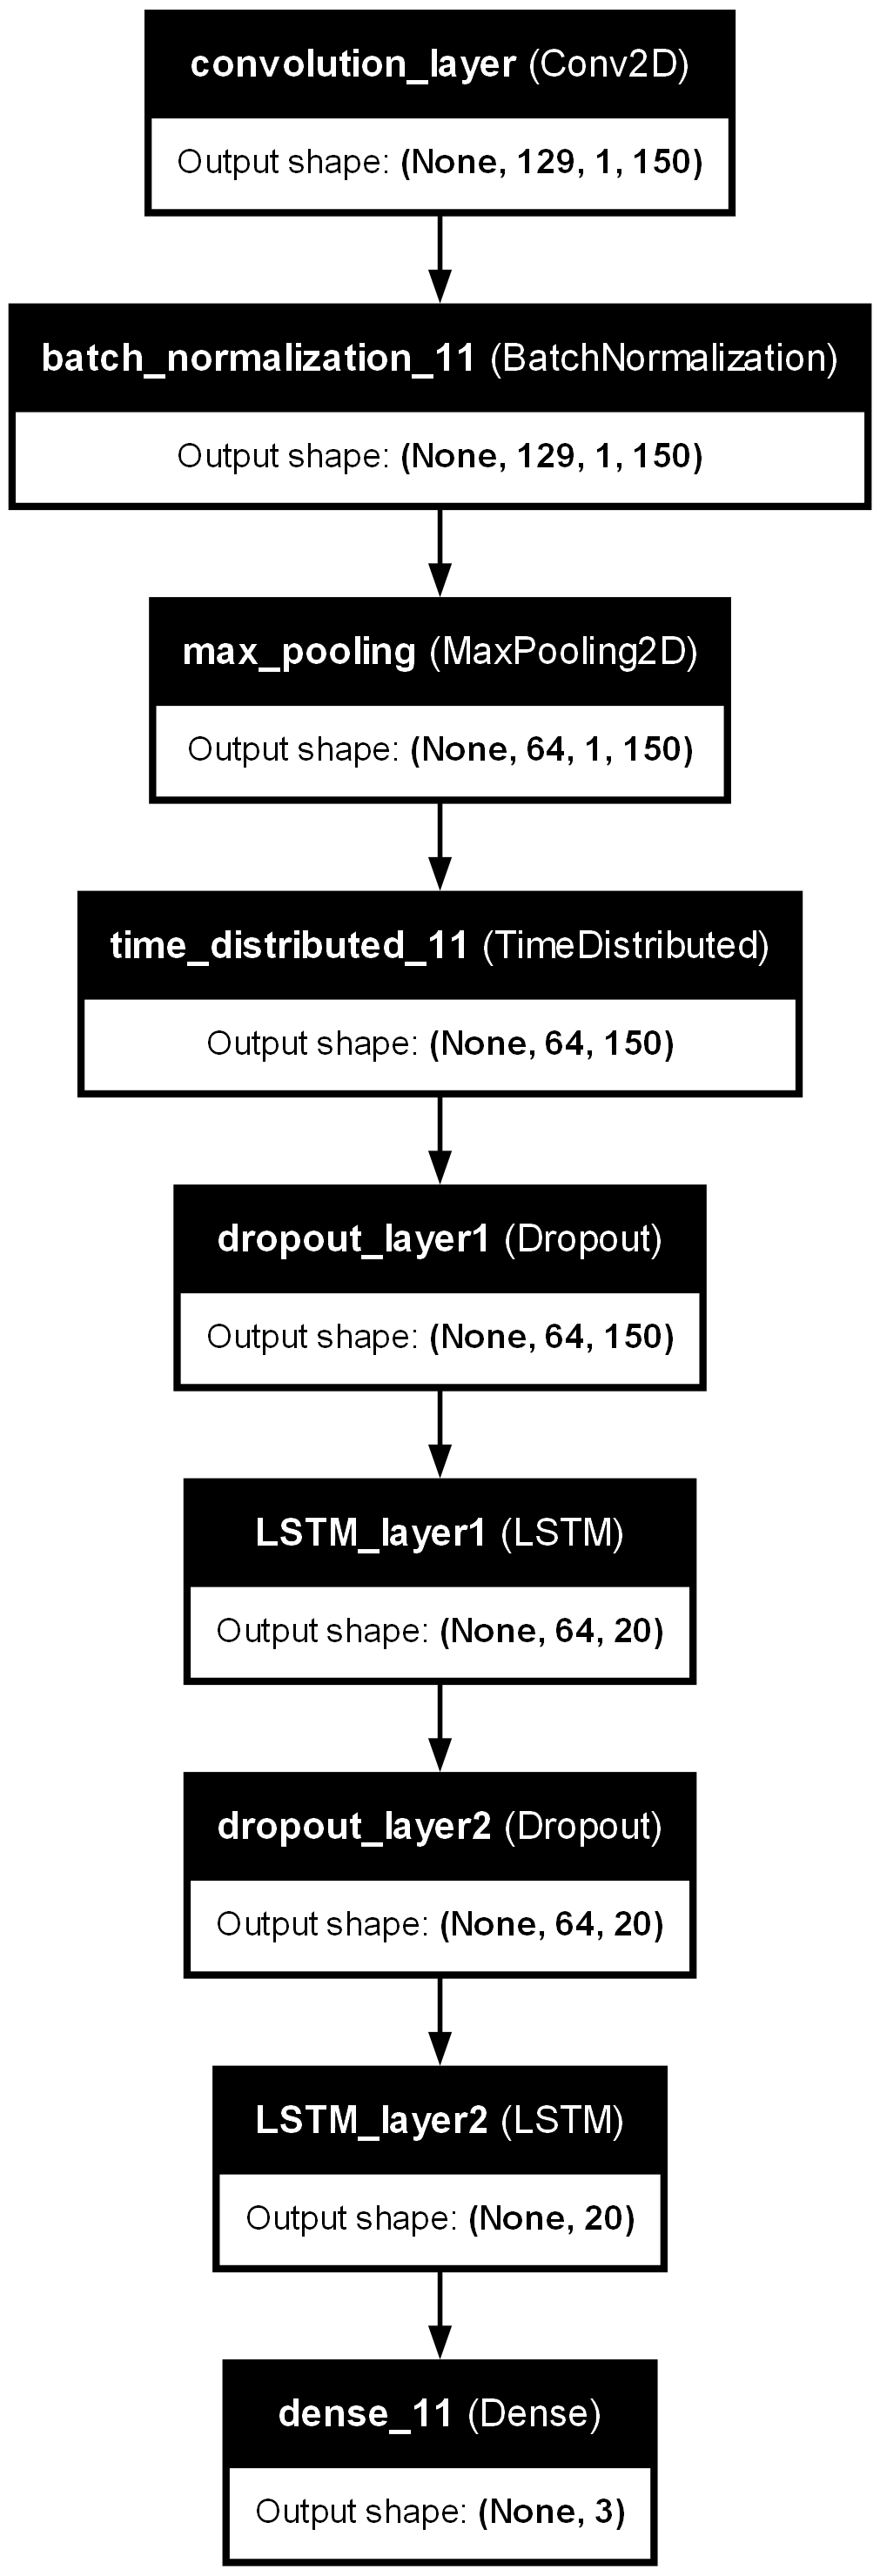

In [312]:
plot_model(model, to_file='../design/model_CNN_sentiment_plot.png', show_shapes=True, show_layer_names=True)

> Dump file model_cnn_sentiment.h5

In [313]:
model.save('../model/model_cnn_sentiment.h5')

### 3.5 Evaluation test dataset

> Load file models_sentiment.h5

In [314]:
model_sentiment=load_model("../model/model_cnn_sentiment.h5")

> predict  test dataset 

In [315]:
result = model_sentiment.predict(test_data)

70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


> First 10 lines of comments

In [316]:
predict_labels = np.argmax(result,axis=1)
print(predict_labels[0:10])
# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predict_labels)
print(predicted_labels_decoded[0:10])


[2 2 2 0 2 0 2 2 2 2]
['Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive']


> Data Preprocessing sample

In [317]:
def Preprocessing(comment):
    comment= remove_punctuation(comment.lower())
    comment= normalize_numbers(comment)
    comment= remove_stopword(comment)
    comment= ViTokenizer.tokenize(comment)
    comment= [remove_repeated_words(comment)]
    comment = wordseparation(comment)
    comment =np.expand_dims(comment_embedding(comment[0]),axis=0)
    return comment

> Predict one a new sample

In [318]:
comment = "Máy thiết kế quá đẹp ,dùng dk mấy hôm r thấy máy vẫn ổn ,tiếc là pin tụt quá nhanh ,pin sạc thì nhanh nóng 😌"
comment_preprocessed=Preprocessing(comment)
result_one = model_sentiment.predict(comment_preprocessed)
result_one = np.argmax(result_one,axis=1)
# Decode the predicted labels
print(label_encoder.inverse_transform(result_one))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
['Positive']


> Evaluate the model through Accuracy measures,Precision,Recall,F1-score,

In [319]:
accuracy = accuracy_score(y_test_encoded, predict_labels)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_encoded, predict_labels, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test_encoded, predict_labels, average='weighted')
print(f"Recall: {recall:.4f}")

f1score = f1_score(y_test_encoded, predict_labels, average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.8197
Precision: 0.8193
Recall: 0.8197
F1-score: 0.8194673842306035
